<a href="https://colab.research.google.com/github/Femii66/Data-science/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Data Exploration

In [ ]:
data.dropna(inplace= True) #inplace will save it to the data. (na) means no value

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


##Train test split


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13269,-117.66,34.09,20.0,2462.0,496.0,1117.0,458.0,3.2321,INLAND,162500.0
16014,-122.47,37.74,52.0,3688.0,640.0,1605.0,567.0,4.9537,NEAR BAY,365600.0
11947,-117.44,33.93,34.0,1577.0,272.0,880.0,284.0,4.6327,INLAND,116000.0
7732,-118.14,33.93,31.0,3205.0,727.0,1647.0,664.0,3.3681,<1H OCEAN,223900.0
1972,-120.54,38.75,9.0,3006.0,540.0,1102.0,418.0,3.9812,INLAND,136600.0
...,...,...,...,...,...,...,...,...,...,...
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,NEAR BAY,226700.0
66,-122.30,37.81,48.0,1455.0,354.0,788.0,332.0,0.8056,NEAR BAY,84400.0
11548,-118.02,33.73,26.0,3711.0,610.0,1902.0,597.0,5.5599,<1H OCEAN,234100.0
19955,-119.34,36.21,30.0,749.0,214.0,537.0,199.0,0.8229,INLAND,68400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

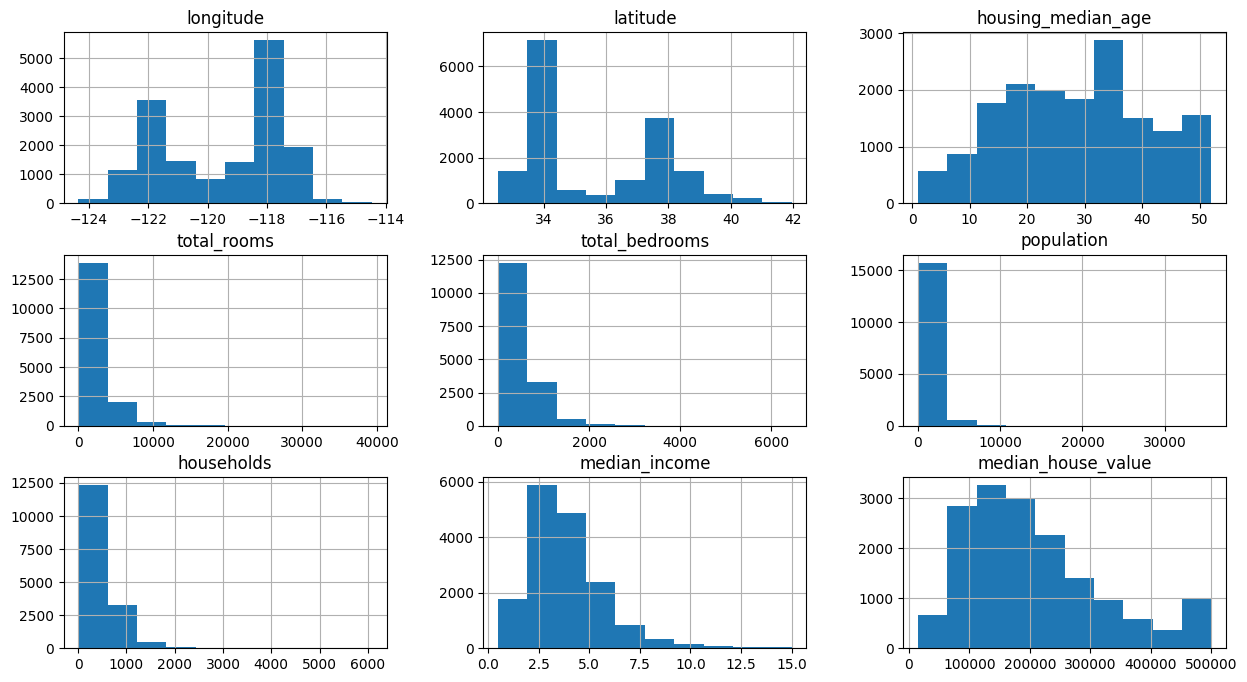

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
'''plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")'''

##Data preprocessing

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

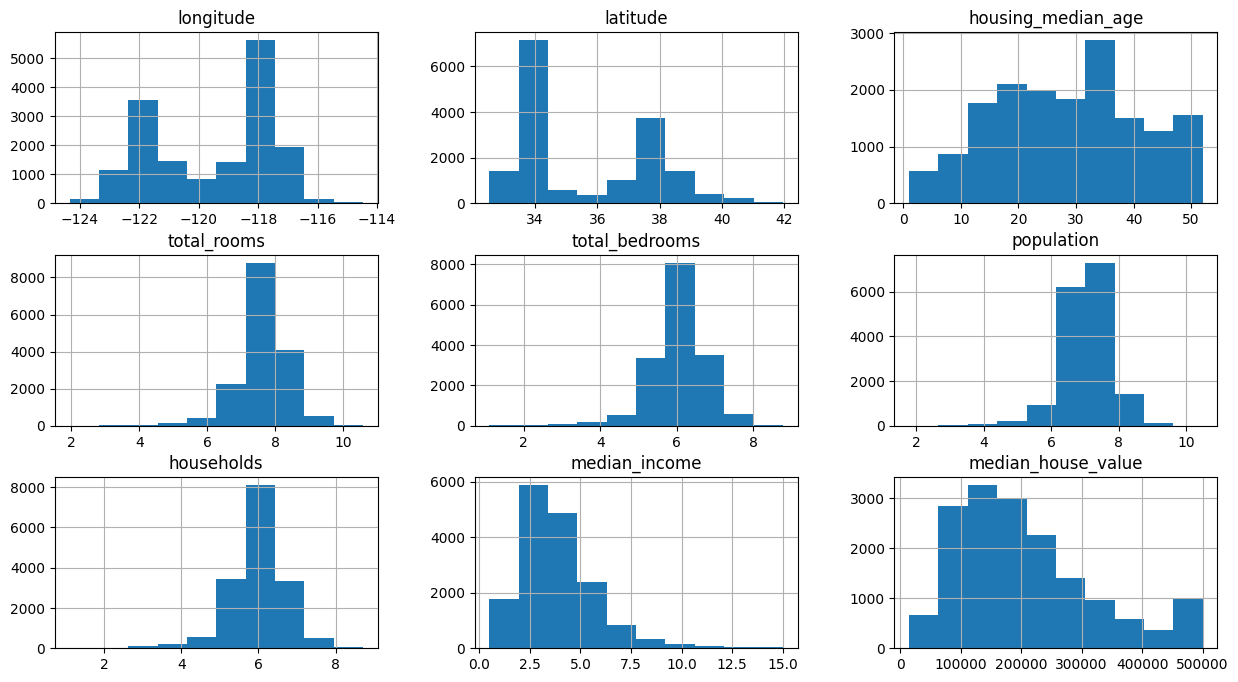

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7259
INLAND,5171
NEAR OCEAN,2073
NEAR BAY,1839
ISLAND,4


In [ ]:
#pd.get_dummies(train_data.ocean_proximity)
#for converting values at ocean proximity to true or false

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13269,-117.66,34.09,20.0,7.809135,6.208590,7.019297,6.129050,3.2321,162500.0,False,True,False,False,False
16014,-122.47,37.74,52.0,8.213111,6.463029,7.381502,6.342121,4.9537,365600.0,False,False,False,True,False
11947,-117.44,33.93,34.0,7.363914,5.609472,6.781058,5.652489,4.6327,116000.0,False,True,False,False,False
7732,-118.14,33.93,31.0,8.072779,6.590301,7.407318,6.499787,3.3681,223900.0,True,False,False,False,False
1972,-120.54,38.75,9.0,8.008698,6.293419,7.005789,6.037871,3.9812,136600.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,-122.26,37.84,42.0,7.846199,6.501290,7.095893,6.390241,2.0804,226700.0,False,False,False,True,False
66,-122.30,37.81,48.0,7.283448,5.872118,6.670766,5.808142,0.8056,84400.0,False,False,False,True,False
11548,-118.02,33.73,26.0,8.219326,6.415097,7.551187,6.393591,5.5599,234100.0,True,False,False,False,False
19955,-119.34,36.21,30.0,6.620073,5.370638,6.287859,5.298317,0.8229,68400.0,False,True,False,False,False


<Axes: >

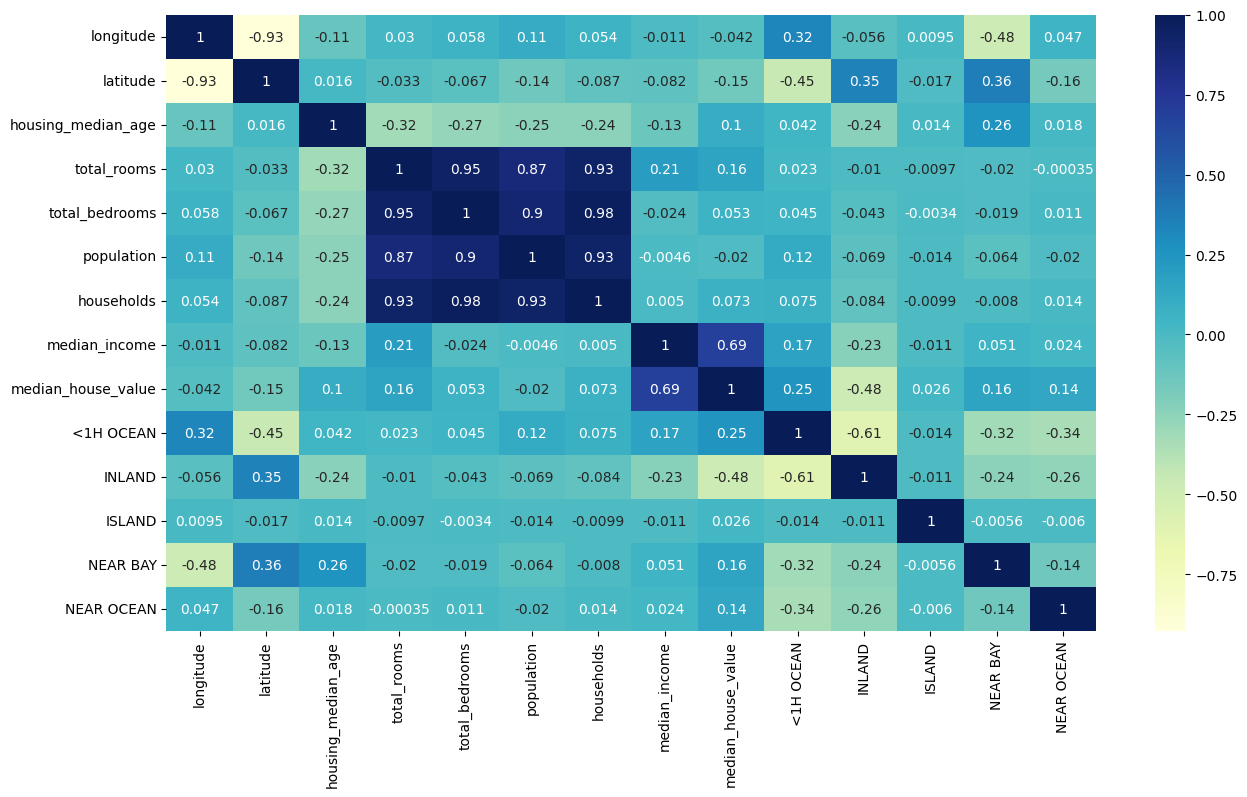

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

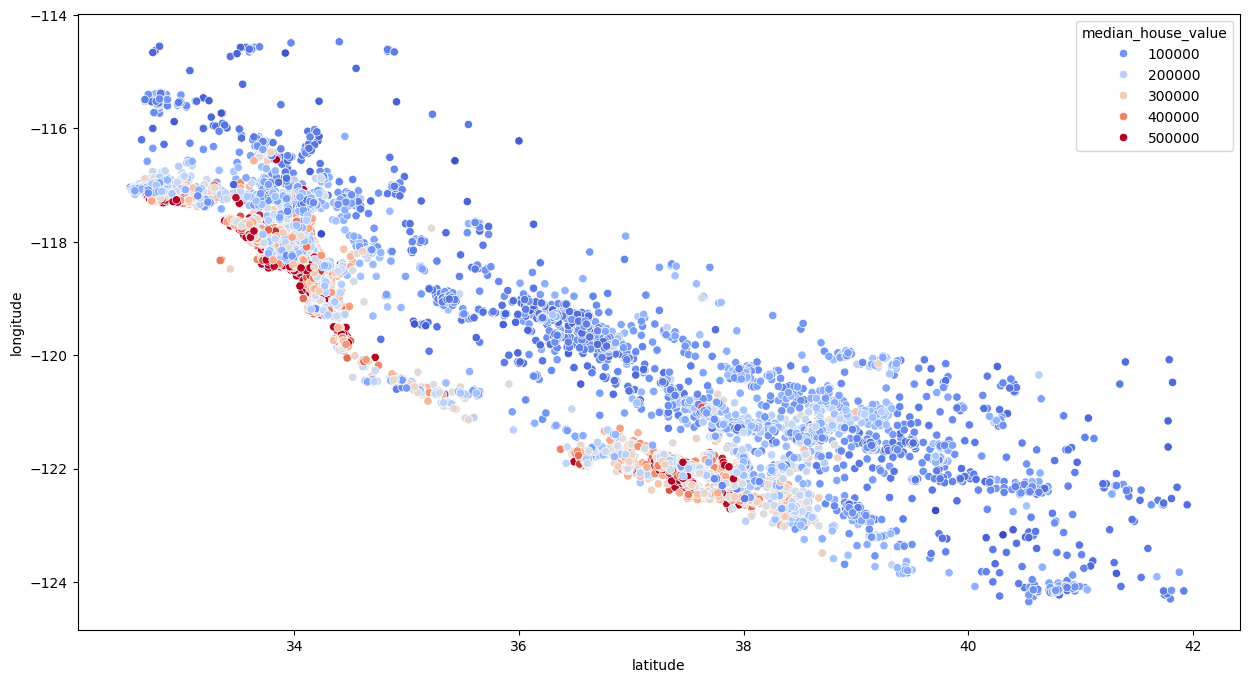

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

## Feature Engineering

In [ ]:
#this is like creating new features it could be by combining two old features

In [ ]:
#how many bedrooms per room
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
#how many rooms per household
train_data["household_rooms"] = train_data["total_rooms"]/train_data["households"]


<Axes: >

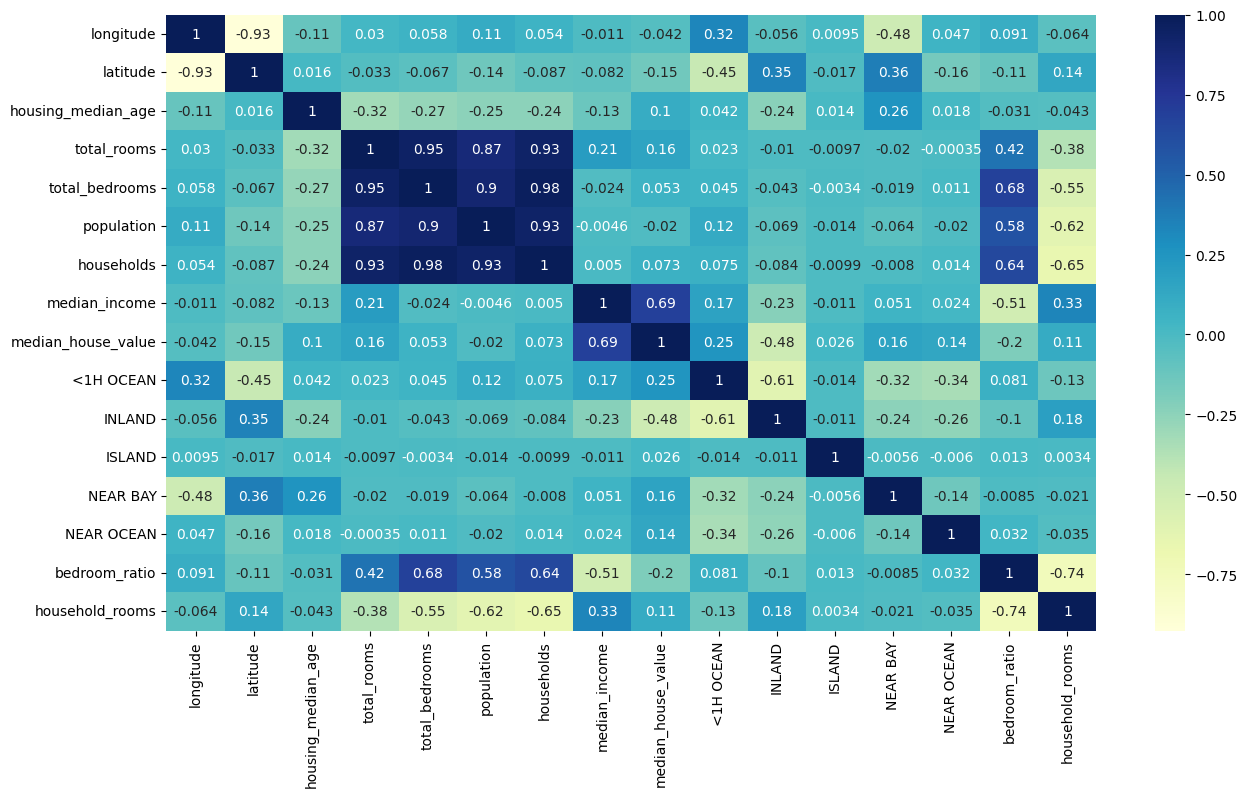

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

x_train = train_data.drop("median_house_value", axis=1)
y_train = train_data["median_house_value"]

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
LinearRegression()

LinearRegression()

In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)


test_data["bedroom_ratio"] = test_data["total_bedrooms"]/test_data["total_rooms"]

test_data["household_rooms"] = test_data["total_rooms"]/test_data["households"]

In [ ]:
x_test = test_data.drop("median_house_value", axis=1)
y_test = test_data["median_house_value"]

In [ ]:
reg.score(x_test, y_test)

0.68816023308395

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)

0.8261045948707545

In [ ]:
#Parameter grid will get it to a higher accuracy
#use grid search with cross validations
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

Param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, Param_grid, cv=5,
                           scoring = "neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)

In [ ]:
grid_search.best_estimator_.score(x_test, y_test)


0.8263779609007054